In [2]:
# import Packages
import os
from urllib import request, response
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Web Scraping

In [ ]:
url = "https://occovid19.ochealthinfo.com/coronavirus-in-oc"

response = request.urlopen(url)
content = response.read()

with open('occovid.html', "wb") as f:
    f.write(content)

In [3]:
# download html file

save_path = "oc_covid.html"

if ~ os.path.exists(save_path):
    
    url = "https://occovid19.ochealthinfo.com/coronavirus-in-oc" # target website url

    response = request.urlopen(url) # open the website specified by the url
    content = response.read() # read the opened webpage into content

    # save webpage html into the output file
    with open(save_path, "wb") as f:
        f.write(content)

    print("Web data has been written into {0}".format(save_path))

else:

    print("Web data was written into {0}".format(save_path))

Web data has been written into oc_covid.html


In [3]:
# start to parse

with open('occovid.html', "rb") as f:
    content = f.read()

soup = BeautifulSoup(content, "lxml")

# find the target table
div = soup.findAll("div",{"class":"col-md-12"})

In [4]:
# get table 1 colnames
for i in div:
    tr = i.find('tr',{"class":"table-bg-orange table-wp"})
    
colnames_1=[]
for i in tr.select('td'):
    colnames_1.append(i.get_text())
print(colnames_1)

['Week', 'Student', 'Teacher', 'Other Staff', 'Grand Total']


In [5]:
# get table 2 colnames
for i in div:
    tr = i.find_all('tr',{"class":"table-bg-orange table-wp"})
    
for j in tr:
    td = j.find_all('td')

colnames_2=[]
for i in td:
    colnames_2.append(i.get_text())

print(colnames_2) 

['Week', 'Elementary/ Middle', 'High School', 'Combined (K-12)', 'College/ University/ Vocational', 'Grand Total']


In [6]:
# get rownames
for i in div:
    tr = i.find_all('tr',{'class':False})

td=[]
for i in tr:
    j = i.find_all('td',{'class':False, 'align':False, 'colspan':False})
    td.append(j)
td = [x for x in td if x]

rownames=[td[0][0].get_text()]
for i in td[1:87]:
    for j in i:
        rownames.append(j.get_text())
rownames

['Grand Total',
 '2022-04-03 to 2022-04-09',
 '2022-03-27 to 2022-04-02',
 '2022-03-20 to 2022-03-26',
 '2022-03-13 to 2022-03-19',
 '2022-03-06 to 2022-03-12',
 '2022-02-27 to 2022-03-05',
 '2022-02-20 to 2022-02-26',
 '2022-02-13 to 2022-02-19',
 '2022-02-06 to 2022-02-12',
 '2022-01-30 to 2022-02-05',
 '2022-01-23 to 2022-01-29',
 '2022-01-16 to 2022-01-22',
 '2022-01-09 to 2022-01-15',
 '2022-01-02 to 2022-01-08',
 '2021-12-26 to 2022-01-01',
 '2021-12-19 to 2021-12-25',
 '2021-12-12 to 2021-12-18',
 '2021-12-05 to 2021-12-11',
 '2021-11-28 to 2021-12-04',
 '2021-11-21 to 2021-11-27',
 '2021-11-14 to 2021-11-20',
 '2021-11-07 to 2021-11-13',
 '2021-10-31 to 2021-11-06',
 '2021-10-24 to 2021-10-30',
 '2021-10-17 to 2021-10-23',
 '2021-10-10 to 2021-10-16',
 '2021-10-03 to 2021-10-09',
 '2021-09-26 to 2021-10-02',
 '2021-09-19 to 2021-09-25',
 '2021-09-12 to 2021-09-18',
 '2021-09-05 to 2021-09-11',
 '2021-08-29 to 2021-09-04',
 '2021-08-22 to 2021-08-28',
 '2021-08-15 to 2021-08-21'

In [7]:
# get value
td1=[]
for i in tr:
    j = i.find_all('td',{'class':False, 'align':True})
    td1.append(j)
td1 = [x for x in td1 if x]

tab1=[[td[0][1].get_text(),td[0][2].get_text(),td[0][3].get_text(),td[0][4].get_text()]]
for i in td1[0:86]:
    row=[]
    for j in i:
        row.append(j.get_text())
    tab1.append(row)
    
tab2=[[td[87][1].get_text(),td[87][2].get_text(),td[87][3].get_text(),td[87][4].get_text(),td[87][5].get_text()]]
for i in td1[86:]:
    row=[]
    for j in i:
        row.append(j.get_text())
    tab2.append(row)

In [84]:
# tables
table_1 = pd.DataFrame(tab1)
table_2 = pd.DataFrame(tab2)

print(len(table_1))
print(len(table_2))

87
87


In [85]:
table_1.columns = colnames_1[1:]
table_1.index = rownames
print(table_1.head(10))

table_2.columns = colnames_2[1:]
table_2.index = rownames
print(table_2.head(10))

                         Student Teacher Other Staff Grand Total
Grand Total                16135    2126        1585       19846
2022-04-03 to 2022-04-09       0       0           0           0
2022-03-27 to 2022-04-02       9       5           3          17
2022-03-20 to 2022-03-26      29       7           2          38
2022-03-13 to 2022-03-19      24       3           4          31
2022-03-06 to 2022-03-12      26       8           0          34
2022-02-27 to 2022-03-05      76       8           5          89
2022-02-20 to 2022-02-26      20       5           5          30
2022-02-13 to 2022-02-19      29       9           2          40
2022-02-06 to 2022-02-12      55      14           5          74
                         Elementary/ Middle High School Combined (K-12)  \
Grand Total                           10868        4857             482   
2022-04-03 to 2022-04-09                  0           0               0   
2022-03-27 to 2022-04-02                 12           2     

In [83]:
# Saving
table_1.to_csv('covid_1.txt', sep='\t', index=True)
table_2.to_csv('covid_2.txt', sep='\t', index=True)

# Analyses and Visualization

In [9]:
# remove "Grand total" from both tables and reverse data
table_1_1 = table_1[1:].loc[:,['Student','Teacher','Other Staff']].astype(int).iloc[::-1]
table_2_1 = table_2[1:].loc[:,['Elementary/ Middle', 'High School', 'Combined (K-12)', 'College/ University/ Vocational']].astype(int).iloc[::-1]

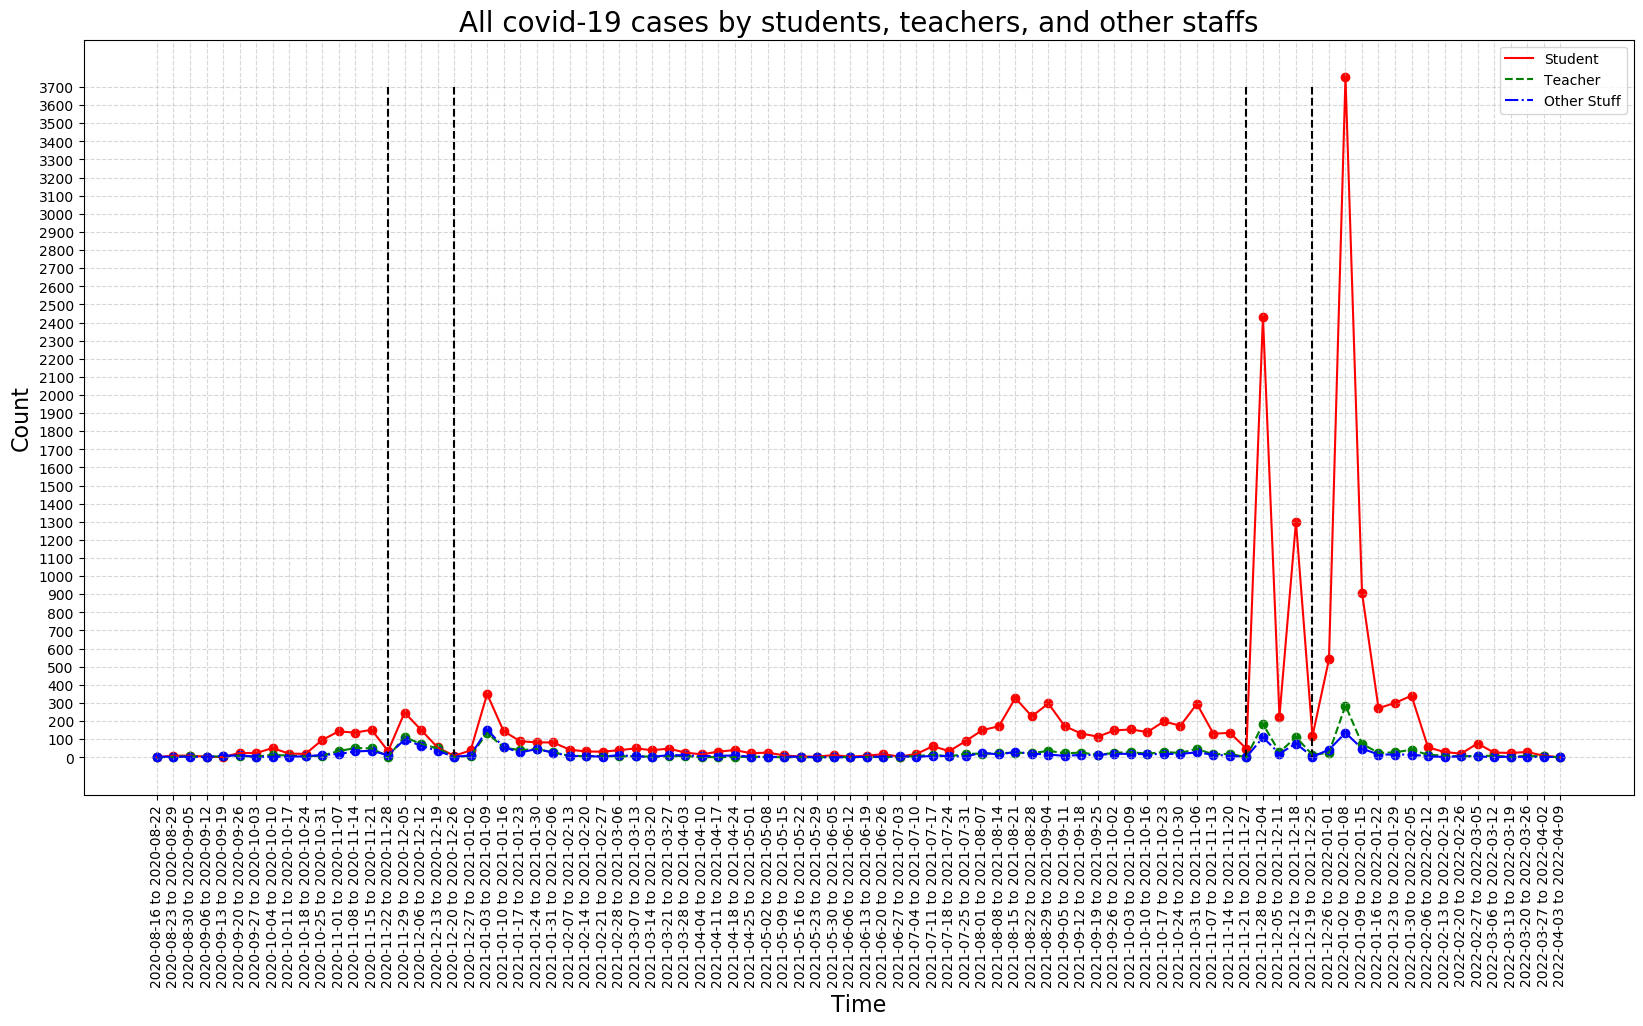

In [16]:
# line plots

plt.figure(figsize=(20, 10), dpi=100)
time = list(table_1_1.index)
Student = list(table_1_1.loc[:,'Student'])
Teacher = list(table_1_1.loc[:,'Teacher'])
Other = list(table_1_1.loc[:,'Other Staff'])
plt.plot(time, Student, c='red', label="Student")
plt.plot(time, Teacher, c='green', linestyle='--', label="Teacher")
plt.plot(time, Other, c='blue', linestyle='-.', label="Other Stuff")
plt.scatter(time, Student, c='red')
plt.scatter(time, Teacher, c='green')
plt.scatter(time, Other, c='blue')
plt.legend(loc='best')
plt.yticks(range(0, 3800, 100))
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Time", fontdict={'size': 16})
plt.ylabel("Count", fontdict={'size': 16})
plt.title("All covid-19 cases by students, teachers, and other staffs", fontdict={'size': 20})
plt.xticks(rotation=90)
plt.vlines('2020-11-22 to 2020-11-28', 0, 3700, color='black',linestyles='dashed')
plt.vlines('2020-12-20 to 2020-12-26', 0, 3700, color='black',linestyles='dashed')
plt.vlines('2021-11-21 to 2021-11-27', 0, 3700, color='black',linestyles='dashed')
plt.vlines('2021-12-19 to 2021-12-25', 0, 3700, color='black',linestyles='dashed')
plt.show()

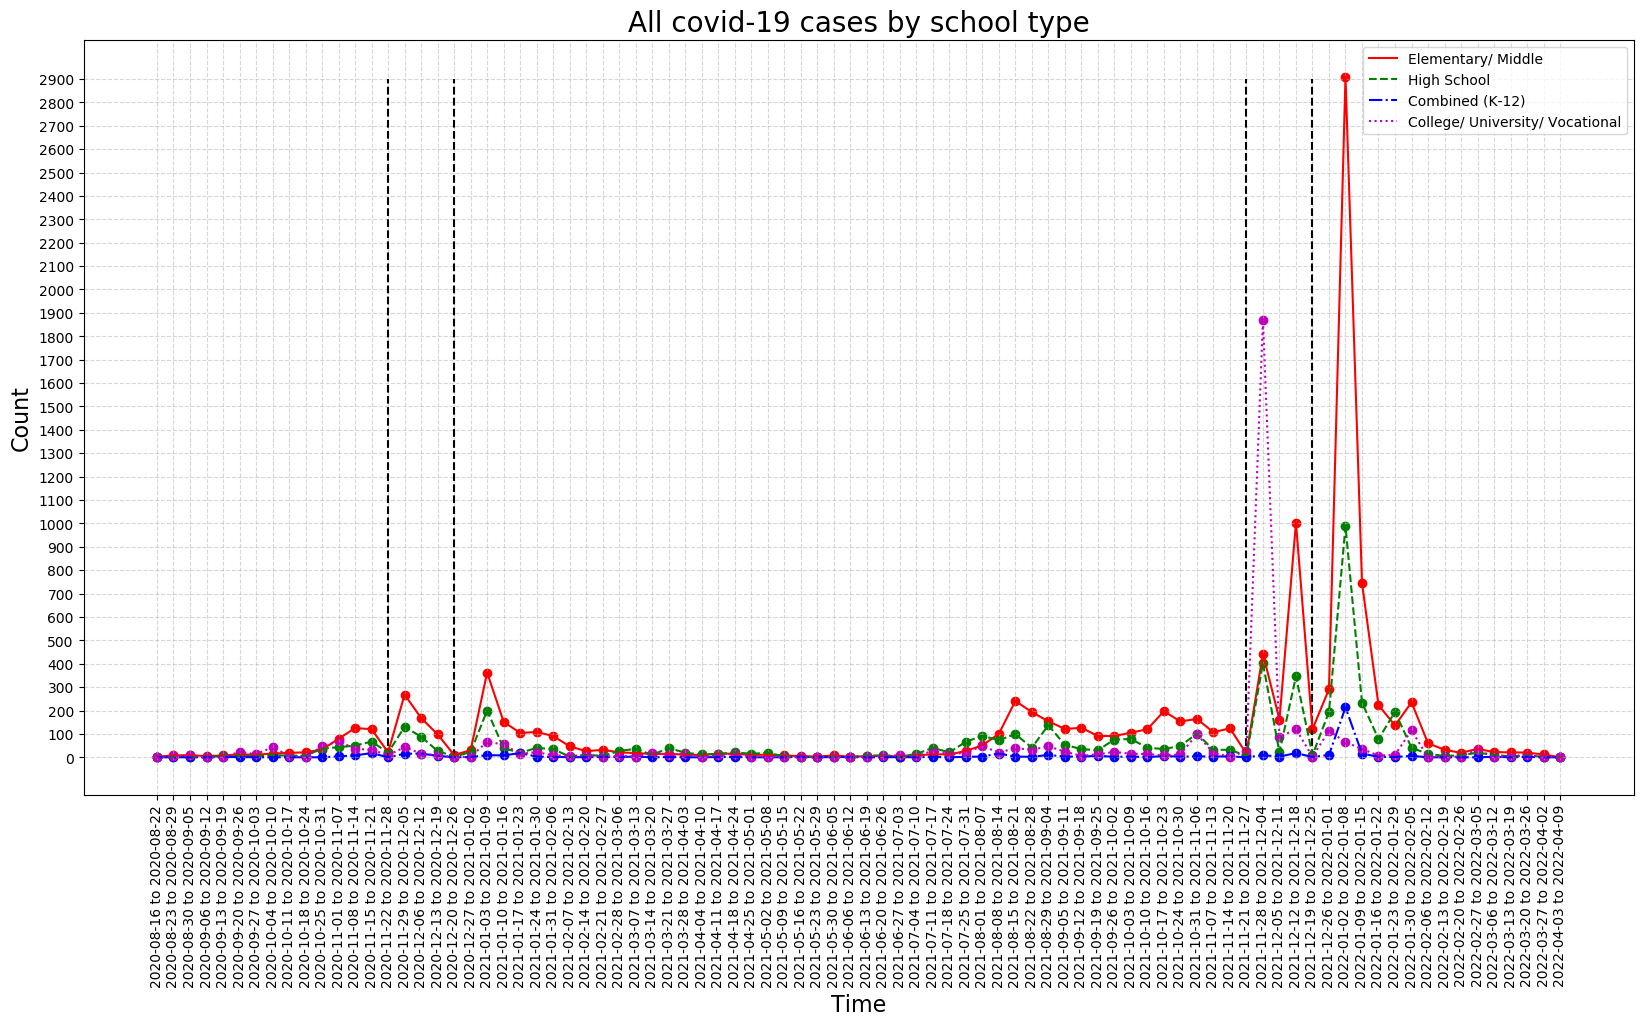

In [86]:
plt.figure(figsize=(20, 10), dpi=100)
time = list(table_2_1.index)
E = list(table_2_1.loc[:,'Elementary/ Middle'])
H = list(table_2_1.loc[:,'High School'])
C = list(table_2_1.loc[:,'Combined (K-12)'])
U = list(table_2_1.loc[:,'College/ University/ Vocational'])

plt.plot(time, E, c='red', label="Elementary/ Middle")
plt.plot(time, H, c='green', linestyle='--', label="High School")
plt.plot(time, C, c='blue', linestyle='-.', label="Combined (K-12)")
plt.plot(time, U, c='m', linestyle=':', label="College/ University/ Vocational")
plt.scatter(time, E, c='red')
plt.scatter(time, H, c='green')
plt.scatter(time, C, c='blue')
plt.scatter(time, U, c='m')
plt.legend(loc='best')
plt.yticks(range(0, 3000, 100))
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Time", fontdict={'size': 16})
plt.ylabel("Count", fontdict={'size': 16})
plt.title("All covid-19 cases by school type", fontdict={'size': 20})
plt.xticks(rotation=90)
plt.vlines('2020-11-22 to 2020-11-28', 0, 2900, color='black',linestyles='dashed')
plt.vlines('2020-12-20 to 2020-12-26', 0, 2900, color='black',linestyles='dashed')
plt.vlines('2021-11-21 to 2021-11-27', 0, 2900, color='black',linestyles='dashed')
plt.vlines('2021-12-19 to 2021-12-25', 0, 2900, color='black',linestyles='dashed')
plt.show()

# Smoothing

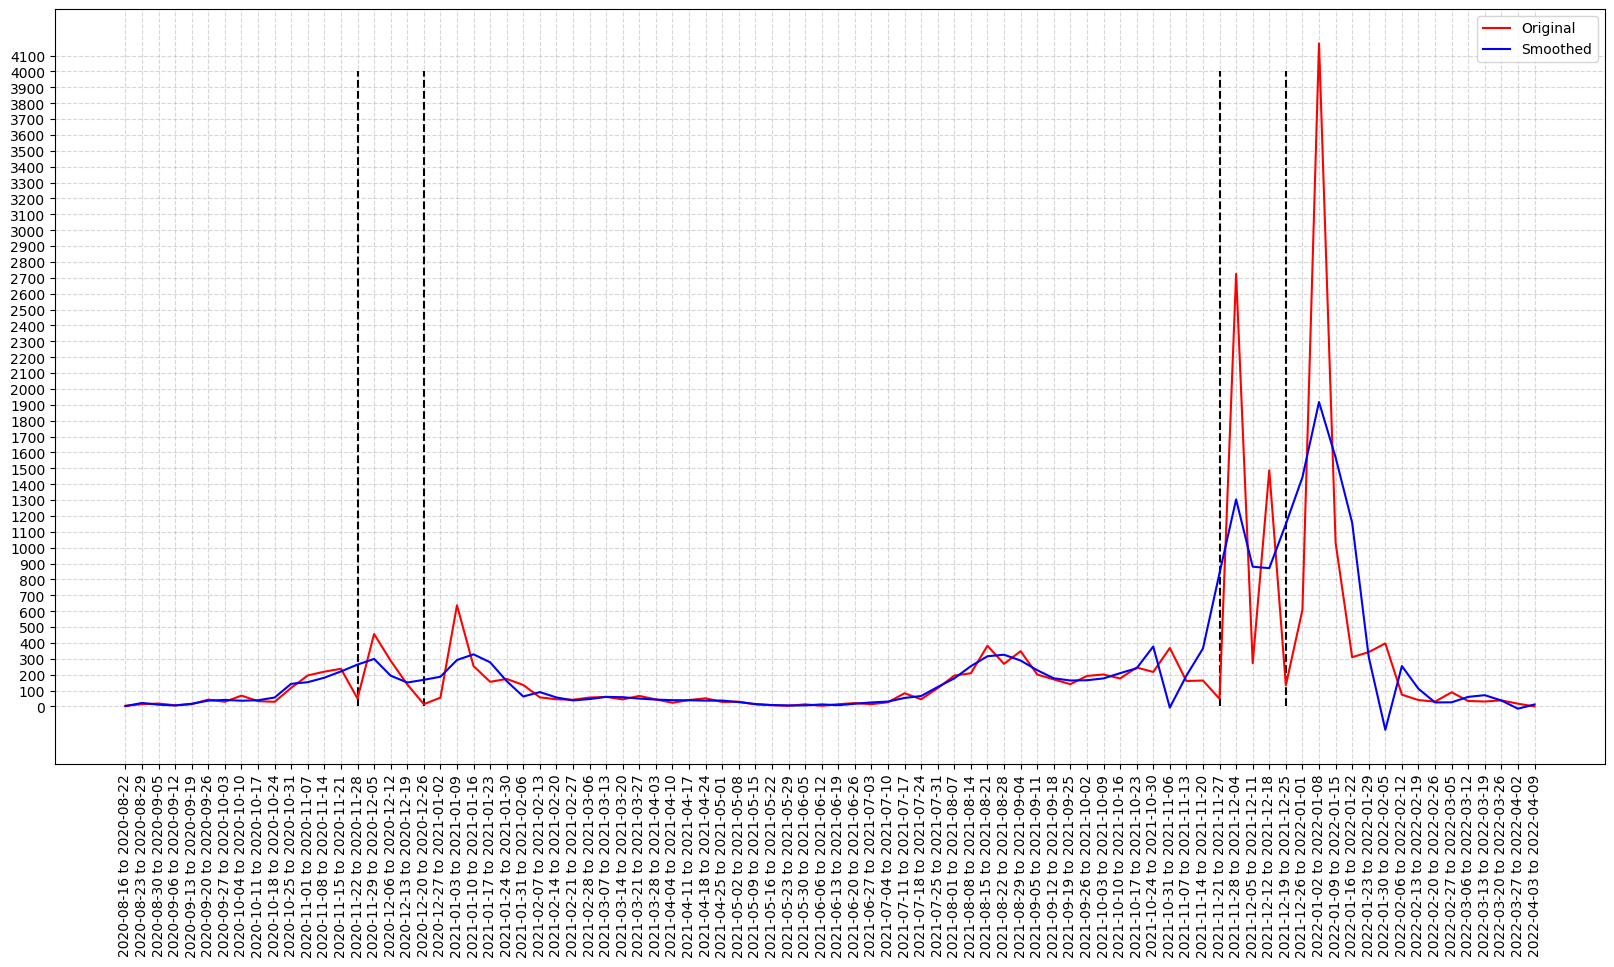

In [76]:
from scipy.signal import savgol_filter
y = table_1[1:].loc[:,['Grand Total']].astype(int).iloc[::-1]
y = list(y.loc[:,'Grand Total'])

yhat = savgol_filter(y, 11, 5)
plt.figure(figsize=(20, 10), dpi=100)
plt.yticks(range(0, 4200, 100))
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot(time, y, color='red')
plt.plot(time, yhat, color='blue')
plt.legend(['Original','Smoothed'],loc='best')
plt.xticks(rotation=90)
plt.vlines('2020-11-22 to 2020-11-28', 0, 4000, color='black',linestyles='dashed')
plt.vlines('2020-12-20 to 2020-12-26', 0, 4000, color='black',linestyles='dashed')
plt.vlines('2021-11-21 to 2021-11-27', 0, 4000, color='black',linestyles='dashed')
plt.vlines('2021-12-19 to 2021-12-25', 0, 4000, color='black',linestyles='dashed')
plt.show()

In [77]:
# predicted value
Thanksgiving_2020 = yhat[time.index('2020-11-22 to 2020-11-28')]
Xmas_2020 = yhat[time.index('2020-12-20 to 2020-12-26')]
Thanksgiving_2021 = yhat[time.index('2021-11-21 to 2021-11-27')]
Xmas_2021 = yhat[time.index('2021-12-19 to 2021-12-25')]

print(Thanksgiving_2020)
print(Xmas_2020)
print(Thanksgiving_2021)
print(Xmas_2021)

263.41958041959634
167.4522144522248
840.0885780886293
1148.5058275058989
